In [ ]:
# Practical 5 : Perform the following operations using Python on the Air quality data sets 
                 # a. Data cleaning
                 # b. Data integration
                 # c. Data transformation
                 # d. Error correcting
                 # e. Data model building

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Excel file
df = pd.read_excel('airquality_data.xlsx')
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
# a) Data Cleaning
# Show basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255493 entries, 1036 to 435738
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   stn_code                     255493 non-null  object        
 1   sampling_date                255493 non-null  object        
 2   state                        255493 non-null  object        
 3   location                     255493 non-null  object        
 4   agency                       255493 non-null  object        
 5   type                         255493 non-null  object        
 6   so2                          255493 non-null  float64       
 7   no2                          255493 non-null  float64       
 8   rspm                         255493 non-null  float64       
 9   spm                          255493 non-null  float64       
 10  location_monitoring_station  254585 non-null  object        
 11  pm2_5                       

In [5]:
# Show missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 stn_code                         0
sampling_date                    0
state                            0
location                         0
agency                           0
type                             0
so2                              0
no2                              0
rspm                             0
spm                              0
location_monitoring_station    908
pm2_5                            0
date                             0
dtype: int64


In [6]:
# Drop rows with too many missing values or impute
df = df.dropna(thresh=len(df.columns)-2)  # drop rows with more than 2 missing values
df.fillna(df.mean(numeric_only=True), inplace=True)  # fill numeric NaNs with column mean

In [7]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [8]:
# Check again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255493 entries, 1036 to 435738
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   stn_code                     255493 non-null  object        
 1   sampling_date                255493 non-null  object        
 2   state                        255493 non-null  object        
 3   location                     255493 non-null  object        
 4   agency                       255493 non-null  object        
 5   type                         255493 non-null  object        
 6   so2                          255493 non-null  float64       
 7   no2                          255493 non-null  float64       
 8   rspm                         255493 non-null  float64       
 9   spm                          255493 non-null  float64       
 10  location_monitoring_station  254585 non-null  object        
 11  pm2_5                       

In [11]:
# (b) Data Integration
# Creating data subsets
df1 = df[['state','location','agency','type']]

df2 = df[['so2','no2','rspm','spm']]

In [12]:
merging=pd.concat([df1,df2],axis=1)
merging

,state,location,agency,type,so2,no2,rspm,spm
1036,Andhra Pradesh,Hyderabad,Andhra Pradesh State Pollution Control Board,Industrial Area,12.9,55.8,143.7,370.700000
1037,Andhra Pradesh,Hyderabad,Andhra Pradesh State Pollution Control Board,Industrial Area,10.4,48.9,124.7,285.700000
1038,Andhra Pradesh,Hyderabad,Andhra Pradesh State Pollution Control Board,Industrial Area,7.6,50.1,88.0,221.300000
1039,Andhra Pradesh,Hyderabad,Andhra Pradesh State Pollution Control Board,Industrial Area,7.3,48.5,82.7,186.700000
1040,Andhra Pradesh,Hyderabad,Andhra Pradesh State Pollution Control Board,Industrial Area,6.8,110.3,122.3,270.700000
...,...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,193.673813
435735,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,193.673813
435736,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,193.673813
435737,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,193.673813


In [18]:
# (c) Data transformation
# Create new feature (e.g., Air Quality Index Category)
def aqi_category(pm2_5):
    if pm2_5 <= 0.12:
        return 'Good'
    elif pm2_5 <= 0.35:
        return 'Moderate'
    else:
        return 'Unhealthy'

df['AQI_Category'] = df['pm2_5'].apply(aqi_category)

df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,AQI_Category
1036,95,2004-01-02 00:00:00,Andhra Pradesh,Hyderabad,Andhra Pradesh State Pollution Control Board,Industrial Area,12.9,55.8,143.7,370.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",40.705424,2004-02-01,Unhealthy
1037,95,2004-01-05 00:00:00,Andhra Pradesh,Hyderabad,Andhra Pradesh State Pollution Control Board,Industrial Area,10.4,48.9,124.7,285.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",40.705424,2004-05-01,Unhealthy
1038,95,2004-01-09 00:00:00,Andhra Pradesh,Hyderabad,Andhra Pradesh State Pollution Control Board,Industrial Area,7.6,50.1,88.0,221.3,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",40.705424,2004-09-01,Unhealthy
1039,95,2004-01-12 00:00:00,Andhra Pradesh,Hyderabad,Andhra Pradesh State Pollution Control Board,Industrial Area,7.3,48.5,82.7,186.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",40.705424,2004-12-01,Unhealthy
1040,95,16-01-04,Andhra Pradesh,Hyderabad,Andhra Pradesh State Pollution Control Board,Industrial Area,6.8,110.3,122.3,270.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",40.705424,2004-01-16,Unhealthy


In [19]:
# (d) Error correcting
# Find anomalies (e.g., negative values in PM2.5)
print("Negative pm2_5 values:\n", df[df['pm2_5'] < 0])

# Replace negative values with NaN and then fill
df['pm2_5'] = df['pm2_5'].apply(lambda x: np.nan if x < 0 else x)
df['pm2_5'].fillna(df['pm2_5'].mean(), inplace=True)

Negative pm2_5 values:
 Empty DataFrame
Columns: [stn_code, sampling_date, state, location, agency, type, so2, no2, rspm, spm, location_monitoring_station, pm2_5, date, AQI_Category]
Index: []


C:\Users\sspag\AppData\Local\Temp\ipykernel_10312\3863015409.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pm2_5'].fillna(df['pm2_5'].mean(), inplace=True)


In [25]:
# (e) Data model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Clean and prepare the data
model_df = df[['so2', 'no2']].dropna()  # drop rows with missing so2 or no2

In [26]:
# Define X and y
X = model_df[['so2']]   # independent variable
y = model_df['no2']     # dependent variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions
y_pred = model.predict(X_test)

In [28]:
# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 312.6287597856487
R² Score: 0.09336009786012756


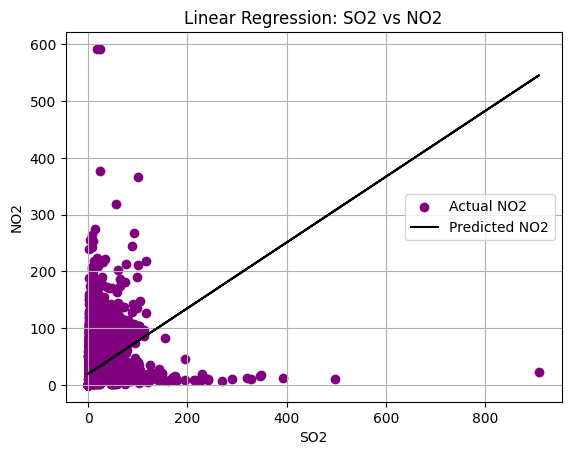

In [29]:
# Plot actual vs predicted NO2 values
plt.scatter(X_test, y_test, color='purple', label='Actual NO2')
plt.plot(X_test, y_pred, color='black', label='Predicted NO2')
plt.xlabel('SO2')
plt.ylabel('NO2')
plt.title('Linear Regression: SO2 vs NO2')
plt.legend()
plt.grid(True)
plt.show()